# **Análise Exploratória de Doenças Cardiovasculares**

**Grupo 04** (Alexandre Oliveira, Philippe Sotero, Letícia Silva e Natália Mafra)

## **1. Introdução**
As doenças cardiovasculares são a principal causa de morte no mundo: mais pessoas morrem anualmente por essas enfermidades do que por qualquer outra causa. Estima-se que 17,9 milhões de pessoas morreram por doenças cardiovasculares em 2016, representando 31% de todas as mortes em nível global. Destes óbitos, estima-se que 85% ocorrem devido a ataques cardíacos e acidentes vasculares cerebrais (AVCs). Mais de três quartos das mortes por doenças cardiovasculares ocorrem em países de baixa e média renda. Das 17 milhões de mortes prematuras (pessoas com menos de 70 anos) por doenças crônicas não transmissíveis, 82% acontecem em países de baixa e média renda e 37% são causadas por doenças cardiovasculares. Fonte: https://www.paho.org/pt/topicos/doencas-cardiovasculares



<img src = "img/10830.jpeg">

## **2. Obtenção dos Dados**

Este projeto desenvolve uma análise exploratória dos dados fornecidos pelo *UCI Heart Disease dataset*, disponível no link abaixo:
https://www.kaggle.com/andrewmvd/heart-failure-clinical-data?select=heart_failure_clinical_records_dataset.csv

### **2.1 Importação das Bibliotecas**

In [ ]:
# Bibliotecas a serem utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Padronização da exibição dos dados com o Pandas
pd.options.display.float_format = '{:.2f}'.format

### **2.2 Importação do Dataset**

In [ ]:
# Base de dados disponível na pasta "data"
df = pd.read_csv('data/heart_failure_clinical_records_dataset.csv')

## **3. Visão geral do conjunto de dados**

In [ ]:
# Visão inicial do DataFrame a partir das 5 primeiras linhas

df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.00,0,582,0,20,1,265000.00,1.90,130,1,0,4,1
1,55.00,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
2,65.00,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
3,50.00,1,111,0,20,0,210000.00,1.90,137,1,0,7,1
4,65.00,1,160,1,20,0,327000.00,2.70,116,0,0,8,1


### **3.1 Dimensões do DataFrame**


In [ ]:
print('Entradas: ', df.shape[0])
print('Variáveis: ', df.shape[1])

Entradas:  299
Variáveis:  13


### **3.2 Análise rápida do tipo de dados**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


A partir dos dados obtidos acima com o método _.info_, observamos que:

    1. Os nomes das colunas estão todos em inglês
    2. Todas as células das 299 colunas estão preenchidas
    3. Todas as colunas são do tipo inteiro ou float

#### **3.2.1. Alterando os nomes das colunas**

In [ ]:
# Para facilitar a manipulação, mudaremos os nomes das colunas para o português
# Colocaremos também as iniciais em maiúsculas
df.columns =['Idade', 'Anemia', 'Creatinafosfoquinase', 'Diabetes', 
            'Fracao_ejecao', 'Pressao_alta', 'Plaquetas', 'Creatinina_soro', 
            'Sodio_soro', 'Sexo', 'Fumante', 'Tempo', 'Morte']
           

In [ ]:
# Testando a alteração dos nomes das colunas:
df.columns

Index(['Idade', 'Anemia', 'Creatinafosfoquinase', 'Diabetes', 'Fracao_ejecao',
       'Pressao_alta', 'Plaquetas', 'Creatinina_soro', 'Sodio_soro', 'Sexo',
       'Fumante', 'Tempo', 'Morte'],
      dtype='object')

#### **3.2.2. Confirmando a ausência de valores nulos**

Considerando que a base de dados contempla dados de 299 pacientes e que todas as colunas tem 299 células preenchidas, percebemos que **não há nenhum valor faltante, ou seja, nulo**.

Essa conclusão pode ser confirmada pela aplicação do método .isnull() na base original, seguido do método .sum():

In [ ]:
df.isnull().sum()

Idade                   0
Anemia                  0
Creatinafosfoquinase    0
Diabetes                0
Fracao_ejecao           0
Pressao_alta            0
Plaquetas               0
Creatinina_soro         0
Sodio_soro              0
Sexo                    0
Fumante                 0
Tempo                   0
Morte                   0
dtype: int64

**Confirmada, portanto, a conclusão de que a base de dados não possui valores faltantes ou nulos.**

#### **3.2.3. Tipos de variáveis**

Como vimos, são 13 as variáveis encontradas neste DataSet:

*  **Idade (anos)**: idade do paciente.
*  **Anemia (Sim/Não)**: paciente com anemia = 1, paciente sem anemia = 0.
*  **Creatinafosfoquinase (mcg/L)**: proteína encontrada no sangue/músculo cardíaco sendo utilizada como marcador do infarto. VR: 32 a 294 U/L.
*  **Diabetes (Sim/Não)**: pacientes com diabetes = 1, sem diabetes = 0.
*  **Fracao_ejecao (%)**: capacidade de expulsar sangue do coração. VR: (%) 55/70(normal) 40/54 levemente abaixo, 35/39 moderadamente abaixo, menos de 35, severamente abaixo do normal.
*  **Pressao_alta (Sim/Não)**: danifica as artérias e levam a doenças cardiovasculares. Pacientes com pressão alta = 1, sem pressão alta = 0.
*  **Plaquetas (kiloplatelets/mL)**: responsáveis pela coagulação sanguínea: 150k a 450k - normal, >450k: thrombocytosis (dores de cabeça, fraqueza, tonturas,etc <150k: thrombocytopenia (hemorragia)
*  **Creatinina_soro (mg/dL)**: substância presente no sangue e eliminada pelos rins, quando não bem eliminada pode provocar problemas cardiovasculares. VR: 0,5 a 1,2 mg/dL, alta:cansaço excessivo, falta de ar. baixo: indica doenças hepáticas. Veja que no nosso dataset os valores estão muito alto, o que pode afetar os rins e de tabela o coração.
*  **Sódio (mEq/L)**: nível de sódio no sangue (135 a 145) mEq/L - <135 (mais velhos, letargia, personalidade alterada, confusão), > 145: desordem muscular, coma e morte.
*  **Sexo (Sim/Não)**: homem = 1 e mulher = 0
*  **Fumante (Sim/Não)**: 1 e não fumante = 0
*  **Tempo (dias)**: tempo de acompanhamento médico.
*  **Morte(Sim/Não)**: morto = 1 e vivo = 0.

Nota-se pela análise das colunas que não os tipos de dados desta base não são categóricos, apenas numéricos (_int_ e _float_).

Para garantir que não sejam feitas análises numéricas em colunas que contém dados booleanos, transformaremos as variáveis conceitualmentecategóricas de _int_ para _bool_:

In [ ]:
# Antes:
display(df)

,Idade,Anemia,Creatinafosfoquinase,Diabetes,Fracao_ejecao,Pressao_alta,Plaquetas,Creatinina_soro,Sodio_soro,Sexo,Fumante,Tempo,Morte
0,75.00,0,582,0,20,1,265000.00,1.90,130,1,0,4,1
1,55.00,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
2,65.00,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
3,50.00,1,111,0,20,0,210000.00,1.90,137,1,0,7,1
4,65.00,1,160,1,20,0,327000.00,2.70,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.00,0,61,1,38,1,155000.00,1.10,143,1,1,270,0
295,55.00,0,1820,0,38,0,270000.00,1.20,139,0,0,271,0
296,45.00,0,2060,1,60,0,742000.00,0.80,138,0,0,278,0
297,45.00,0,2413,0,38,0,140000.00,1.40,140,1,1,280,0


In [ ]:
# Trocando o tipo das variáveis int para bool:

colunas_para_troca = [['Anemia'], ['Diabetes'], ['Pressao_alta'], ['Sexo'], ['Fumante'], ['Morte']]
for coluna in colunas_para_troca:
    df[coluna] = df[coluna].astype(bool)

# Depois:
display(df)

,Idade,Anemia,Creatinafosfoquinase,Diabetes,Fracao_ejecao,Pressao_alta,Plaquetas,Creatinina_soro,Sodio_soro,Sexo,Fumante,Tempo,Morte
0,75.00,False,582,False,20,True,265000.00,1.90,130,True,False,4,True
1,55.00,False,7861,False,38,False,263358.03,1.10,136,True,False,6,True
2,65.00,False,146,False,20,False,162000.00,1.30,129,True,True,7,True
3,50.00,True,111,False,20,False,210000.00,1.90,137,True,False,7,True
4,65.00,True,160,True,20,False,327000.00,2.70,116,False,False,8,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.00,False,61,True,38,True,155000.00,1.10,143,True,True,270,False
295,55.00,False,1820,False,38,False,270000.00,1.20,139,False,False,271,False
296,45.00,False,2060,True,60,False,742000.00,0.80,138,False,False,278,False
297,45.00,False,2413,False,38,False,140000.00,1.40,140,True,True,280,False


Agora sim podemos usar o método .describe() para obter dados estatísticos gerais das variáveis quantitativas (numéricas):

In [ ]:
df.describe()

,Idade,Creatinafosfoquinase,Fracao_ejecao,Plaquetas,Creatinina_soro,Sodio_soro,Tempo
count,299.00,299.00,299.00,299.00,299.00,299.00,299.00
mean,60.83,581.84,38.08,263358.03,1.39,136.63,130.26
std,11.89,970.29,11.83,97804.24,1.03,4.41,77.61
min,40.00,23.00,14.00,25100.00,0.50,113.00,4.00
25%,51.00,116.50,30.00,212500.00,0.90,134.00,73.00
50%,60.00,250.00,38.00,262000.00,1.10,137.00,115.00
75%,70.00,582.00,45.00,303500.00,1.40,140.00,203.00
max,95.00,7861.00,80.00,850000.00,9.40,148.00,285.00


### **4. Limpeza de dados**

Embora já tenhamos inicialmente identificado que não há valores nulos ou faltantes, é preciso descobrir se existem valores destoantes (outliers) para que sejam tratados ou eliminados.

### **4.1 Outliers**

Utilizando _boxplot_ para analisar as propriedades de um conjunto de valores numéricos como mínimo, primeiro quartil, mediana, terceiro quartil e máximo das colunas do DataFrame, localizamos os seguintes dados e Outliers:

**Creatinafosfoquinase**

In [ ]:
# Identificando os valores máximo e mínimo limites da variável
maior_valor_Creatinafosfoquinase = (df["Creatinafosfoquinase"].mean()+2*df["Creatinafosfoquinase"].std()) 
menor_valor_Creatinafosfoquinase = (df["Creatinafosfoquinase"].mean()-2*df["Creatinafosfoquinase"].std())
print(f'Maior valor tolerado: {maior_valor_Creatinafosfoquinase:.2f} | Menor valor tolerado: {menor_valor_Creatinafosfoquinase:.2f}')

# Definindo os outliers
filtro_Creatinafosfoquinase = (df["Creatinafosfoquinase"] > maior_valor_Creatinafosfoquinase) | (df["Creatinafosfoquinase"] < menor_valor_Creatinafosfoquinase)

# Exibindo os outliers em ordem decrescente
df['Creatinafosfoquinase'][filtro_Creatinafosfoquinase].sort_values(ascending=False)

Maior valor tolerado: 2522.42 | Menor valor tolerado: -1358.74


1      7861
60     7702
72     5882
103    5209
134    4540
171    3966
52     3964
227    2794
280    2695
38     2656
Name: Creatinafosfoquinase, dtype: int64

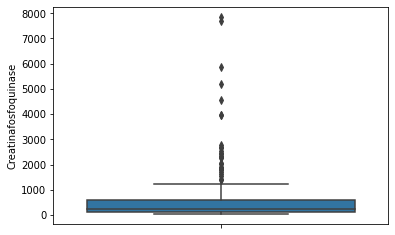

In [ ]:
# Exibindo os outliers no Boxplot:
ax = sns.boxplot(y="Creatinafosfoquinase", data=df)

**Fração Ejeção**

In [ ]:
# Identificando os valores máximo e mínimo limites da variável
maior_valor_Fracao_ejecao = (df["Fracao_ejecao"].mean()+2*df["Fracao_ejecao"].std()) 
menor_valor_Fracao_ejecao = (df["Fracao_ejecao"].mean()-2*df["Fracao_ejecao"].std())
print(f'Maior valor tolerado: {maior_valor_Fracao_ejecao:.2f} | Menor valor tolerado: {menor_valor_Fracao_ejecao:.2f}')

# Definindo os outliers
filtro_Fracao_ejecao = (df["Fracao_ejecao"] > maior_valor_Fracao_ejecao) | (df["Fracao_ejecao"] < menor_valor_Fracao_ejecao)

# Exibindo os outliers em ordem decrescente
df['Fracao_ejecao'][filtro_Fracao_ejecao].sort_values(ascending=False)

Maior valor tolerado: 61.75 | Menor valor tolerado: 14.41


64     80
217    70
8      65
211    62
52     62
17     14
Name: Fracao_ejecao, dtype: int64

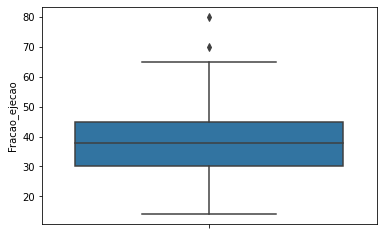

In [ ]:
# Exibindo os outliers no Boxplot:
ax = sns.boxplot(y="Fracao_ejecao", data=df)

**Plaquetas**

In [ ]:
# Identificando os valores máximo e mínimo limites da variável
maior_valor_Plaquetas = (df["Plaquetas"].mean()+2*df["Plaquetas"].std()) 
menor_valor_Plaquetas = (df["Plaquetas"].mean()-2*df["Plaquetas"].std())
print(f'Maior valor tolerado: {maior_valor_Plaquetas:.2f} | Menor valor tolerado: {menor_valor_Plaquetas:.2f}')

# Definindo os outliers
filtro_Plaquetas = (df["Plaquetas"] > maior_valor_Plaquetas) | (df["Plaquetas"] < menor_valor_Plaquetas)

# Exibindo os outliers em ordem decrescente
df['Plaquetas'][filtro_Plaquetas].sort_values(ascending=False)

Maior valor tolerado: 458966.50 | Menor valor tolerado: 67749.56


109   850000.00
296   742000.00
105   621000.00
287   543000.00
240   533000.00
117   507000.00
224   504000.00
69    497000.00
212   481000.00
55    461000.00
230    62000.00
281    51000.00
15     47000.00
277    25100.00
Name: Plaquetas, dtype: float64

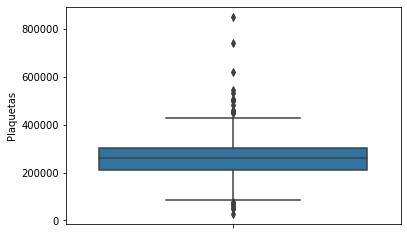

In [ ]:
# Exibindo os outliers no Boxplot:
ax = sns.boxplot(y="Plaquetas", data=df)

**Creatinina Soro**

In [ ]:
# Identificando os valores máximo e mínimo limites da variável
maior_valor_Creatinina_soro = (df["Creatinina_soro"].mean()+2*df["Creatinina_soro"].std()) 
menor_valor_Creatinina_soro = (df["Creatinina_soro"].mean()-2*df["Creatinina_soro"].std())
print(f'Maior valor tolerado: {maior_valor_Creatinina_soro:.2f} | Menor valor tolerado: {menor_valor_Creatinina_soro:.2f}')

# Definindo os outliers
filtro_Creatinina_soro = (df["Creatinina_soro"] > maior_valor_Creatinina_soro) | (df["Creatinina_soro"] < menor_valor_Creatinina_soro)

# Exibindo os outliers em ordem decrescente
df['Creatinina_soro'][filtro_Creatinina_soro].sort_values(ascending=False)

Maior valor tolerado: 3.46 | Menor valor tolerado: -0.68


9     9.40
217   9.00
52    6.80
131   6.10
28    5.80
228   5.00
48    4.40
10    4.00
282   3.80
124   3.70
203   3.50
35    3.50
Name: Creatinina_soro, dtype: float64

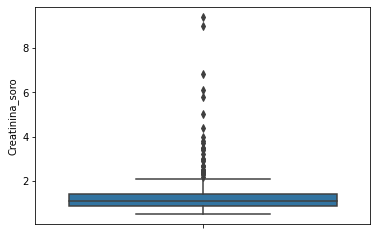

In [ ]:
# Exibindo os outliers no Boxplot:
ax = sns.boxplot(y="Creatinina_soro", data=df)

**Sódio Soro**

In [ ]:
# Identificando os valores máximo e mínimo limites da variável
maior_valor_Sodio_soro = (df["Sodio_soro"].mean()+2*df["Sodio_soro"].std()) 
menor_valor_Sodio_soro = (df["Sodio_soro"].mean()-2*df["Sodio_soro"].std())
print(f'Maior valor tolerado: {maior_valor_Sodio_soro:.2f} | Menor valor tolerado: {menor_valor_Sodio_soro:.2f}')

# Definindo os outliers
filtro_Sodio_soro = (df["Sodio_soro"] > maior_valor_Sodio_soro) | (df["Sodio_soro"] < menor_valor_Sodio_soro)

# Exibindo os outliers em ordem decrescente
df['Sodio_soro'][filtro_Sodio_soro].sort_values(ascending=False)

Maior valor tolerado: 145.45 | Menor valor tolerado: 127.80


236    148
52     146
230    127
65     127
17     127
114    126
225    125
126    124
19     121
4      116
199    113
Name: Sodio_soro, dtype: int64

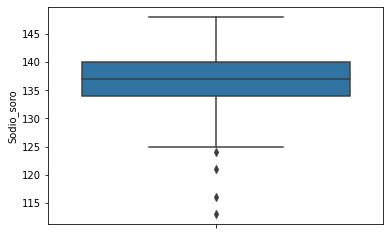

In [ ]:
# Exibindo os outliers no Boxplot:
ax = sns.boxplot(y="Sodio_soro", data=df)

Os outliers influenciam as visões de média, mediana e desvio padrão.  Conforme a análise acima, a colunas que apresenta mais dados desviantes ainda tem menos de 5% do database e não parecem ter relação direta com o resultado Morte por insuficiência cardíaca.

Desse modo, nossa sugestão é, em vez de excluí-las, **substituí-las pelo valor médio**, pois em todas estas colunas a média é muito próxima do valor do 3º quartil (75%).

In [ ]:
# Média:
df.mean()

Idade                      60.83
Anemia                      0.43
Creatinafosfoquinase      581.84
Diabetes                    0.42
Fracao_ejecao              38.08
Pressao_alta                0.35
Plaquetas              263358.03
Creatinina_soro             1.39
Sodio_soro                136.63
Sexo                        0.65
Fumante                     0.32
Tempo                     130.26
Morte                       0.32
dtype: float64

In [ ]:
# Realizando as alterações para a média de cada coluna:

df.loc[filtro_Creatinafosfoquinase, 'Creatinafosfoquinase'] = df['Creatinafosfoquinase'].mean()
df.loc[filtro_Fracao_ejecao, 'Fracao_ejecao'] = df['Fracao_ejecao'].mean()
df.loc[filtro_Plaquetas, 'Plaquetas'] = df['Plaquetas'].mean()
df.loc[filtro_Creatinina_soro, 'Creatinina_soro'] = df['Creatinina_soro'].mean()
df.loc[filtro_Sodio_soro, 'Sodio_soro'] = df['Sodio_soro'].mean()

In [ ]:
# Testando a alteração:
df.describe()

,Idade,Creatinafosfoquinase,Fracao_ejecao,Plaquetas,Creatinina_soro,Sodio_soro,Tempo
count,299.00,299.00,299.00,299.00,299.00,299.00,299.00
mean,60.83,443.21,37.67,255876.13,1.23,136.97,130.26
std,11.89,482.59,11.06,71753.28,0.48,3.49,77.61
min,40.00,23.00,15.00,70000.00,0.50,128.00,4.00
25%,51.00,116.50,30.00,216000.00,0.90,135.00,73.00
50%,60.00,250.00,38.00,263358.03,1.10,137.00,115.00
75%,70.00,582.00,42.50,294500.00,1.39,139.50,203.00
max,95.00,2522.00,60.00,454000.00,3.40,145.00,285.00


## **5. Análise Detalhada**

### **5.1 Histogramas do Dataset**

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: ignored

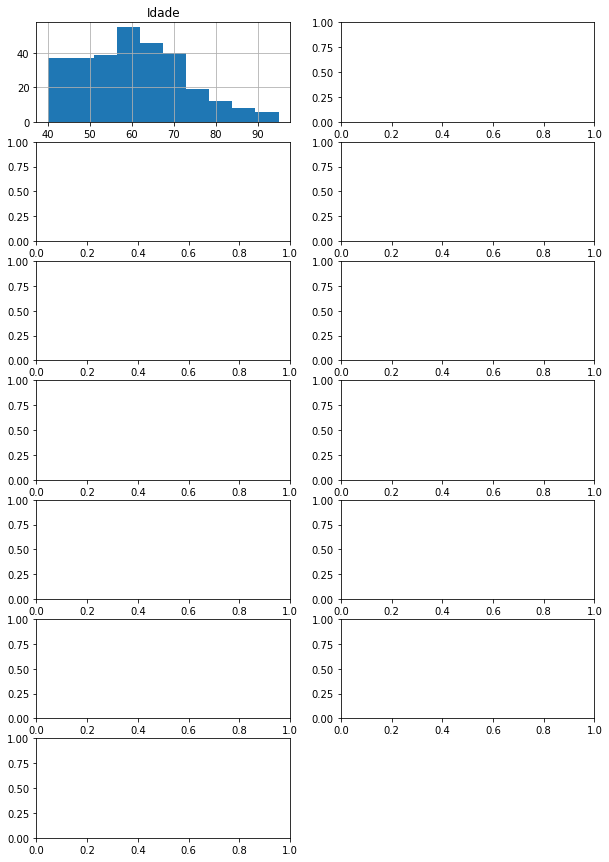

In [ ]:
#Histograma do Dataset
df.hist(layout = (7, 2), xlabelsize = 10, ylabelsize = 10, figsize = (10,15))
plt.show()

### **5.2 Análise de risco de morte**

A matriz abaixo é um excelente recurso visual que  permite identificar a correlação entre todas as variáveis monitoradas na base de dados:

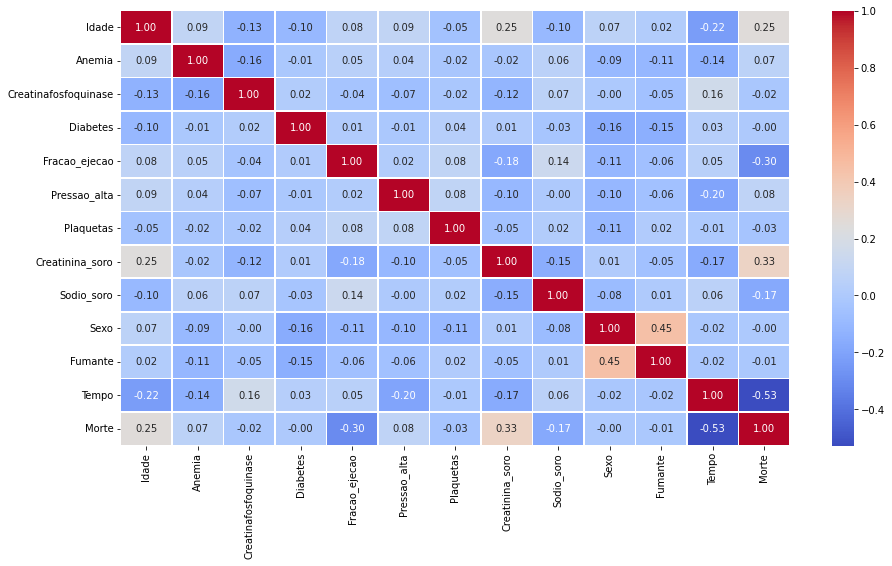

In [ ]:
# plot da matriz de correlação

correlation = df.corr()
plt.figure(figsize = (15,8))
plot = sns.heatmap(correlation, annot = True, fmt=".2f", linewidths=.6, cmap="coolwarm");

Identificamos na análise acima os seguintes fatores como os três que tem maior correlação com o evento "Morte":
1. Tempo
2. Fracao_ejecao
3. Creatinina_soro

**Tempo vs. Morte**

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Morte']==0]['Tempo'], kde=False, bins=50, color='b', label = 'Sobreviventes')
sns.histplot(df[df['Morte']==1]['Tempo'], kde=False, bins=50, color='r', label = 'Mortos')
plt.xlabel('Período de acompanhamento (Dias)', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.title('Distribuição de Período de Acompanhamento de Pacientes', fontsize=18)
plt.legend()
plt.show()

Vê-se que o risco é muito superior quando o período de acompanhamento do paciente é igual ou inferior a 115 dias:

In [ ]:
print(df[df['Tempo'] <= 115].Morte.mean())
print(df[df['Tempo'] > 115].Morte.mean())

0.5033112582781457
0.13513513513513514


**Fracao_ejecao vs. Morte**

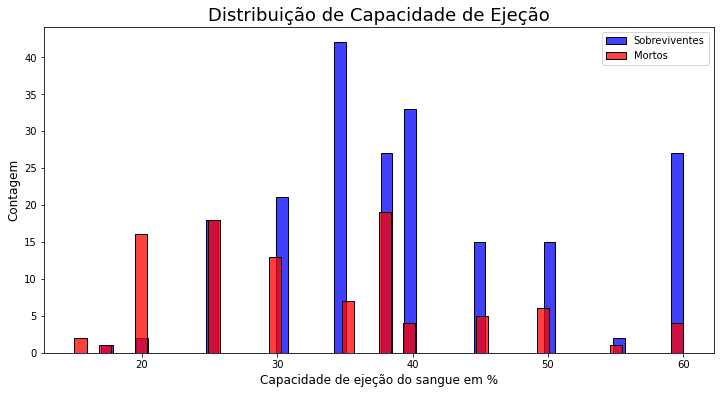

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Morte']==0]['Fracao_ejecao'], kde=False, bins=50, color='b', label = 'Sobreviventes')
sns.histplot(df[df['Morte']==1]['Fracao_ejecao'], kde=False, bins=50, color='r', label = 'Mortos')
plt.xlabel('Capacidade de ejeção do sangue em %', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.title('Distribuição de Capacidade de Ejeção', fontsize=18)
plt.legend()
plt.show()

**Creatinina_soro vs. Morte**

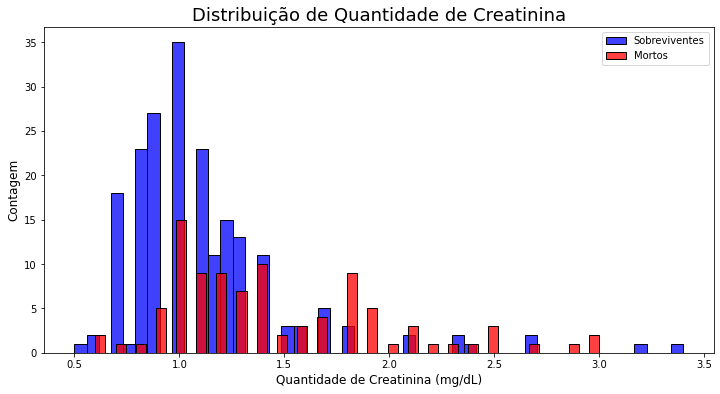

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Morte']==0]['Creatinina_soro'], kde=False, bins=50, color='b', label = 'Sobreviventes')
sns.histplot(df[df['Morte']==1]['Creatinina_soro'], kde=False, bins=50, color='r', label = 'Mortos')
plt.xlabel('Quantidade de Creatinina (mg/dL)', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.title('Distribuição de Quantidade de Creatinina', fontsize=18)
plt.legend()
plt.show()

## **6. Conclusões**

<img src = "img/10831.jpeg">

A partir da base de dados podemos tirar algumas conclusões sobre a incidência do evento morte em pacientes com insuficiência cardíaca:

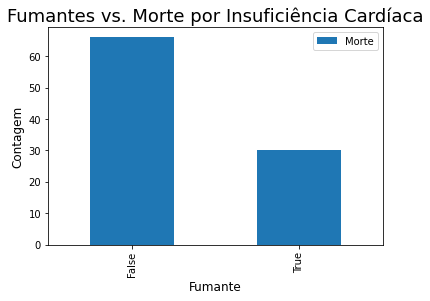

In [ ]:
df.groupby(['Fumante'])[['Morte']].sum().plot(kind = 'bar')
plt.title('Fumantes vs. Morte por Insuficiência Cardíaca', fontsize=18)
plt.xlabel('Fumante', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.legend()
plt.show()